In [1]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier, Lasso
import numpy as np

import matplotlib.pyplot as plt
import mglearn

In [2]:
# leitura do dataset
# dados originais do https://ai.stanford.edu/~amaas/data/sentiment/

BASE_PATH = "/home/igor/datasets/aclImdb/"

reviews_train = load_files(BASE_PATH + "train/")
text_train, y_train = reviews_train.data, reviews_train.target

print("Number of documents in train data: {}".format(len(text_train)))
print("Samples per class (train): {}".format(np.bincount(y_train)))

reviews_test = load_files(BASE_PATH +"test/")
text_test, y_test = reviews_test.data, reviews_test.target

print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of documents in train data: 25000
Samples per class (train): [12500 12500]
Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [3]:
# preparando X_train e X_test

vect = CountVectorizer(min_df=5, ngram_range=(2, 2))
X_train = vect.fit(text_train).transform(text_train)
X_test = vect.transform(text_test)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("X_train:\n{}".format(repr(X_train)))
print("X_test: \n{}".format(repr(X_test)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 129549
X_train:
<25000x129549 sparse matrix of type '<class 'numpy.int64'>'
	with 3607330 stored elements in Compressed Sparse Row format>
X_test: 
<25000x129549 sparse matrix of type '<class 'numpy.int64'>'
	with 3392376 stored elements in Compressed Sparse Row format>
Number of features: 129549


In [5]:
# fazendo os experimentos com Regressão logistica

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Best cross-validation score: 0.88
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1)


/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


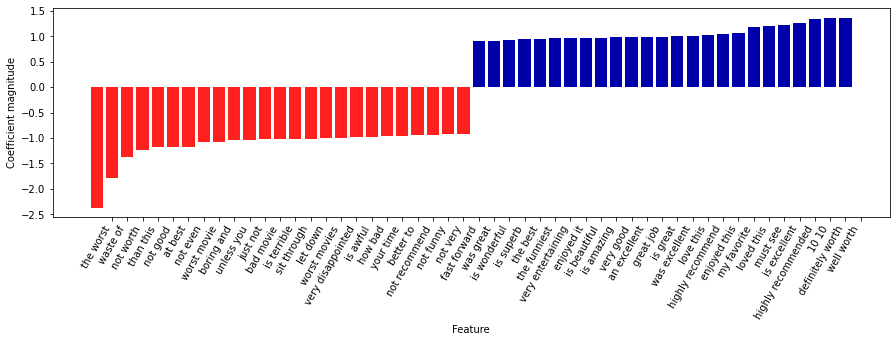

In [6]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=25)
plt.show()

In [7]:
lr = grid.best_estimator_
lr.fit(X_train, y_train)
lr.predict(X_test)
print("Score: {:.2f}".format(lr.score(X_test, y_test)))

Score: 0.88


/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
pos = ["I've seen this story before but my kids haven't. Boy with troubled past joins military, faces his past, falls in love and becomes a man. "
       "The mentor this time is played perfectly by Kevin Costner; An ordinary man with common everyday problems who lives an extraordinary "
       "conviction, to save lives. After losing his team he takes a teaching position training the next generation of heroes. The young troubled "
       "recruit is played by Kutcher. While his scenes with the local love interest are a tad stiff and don't generate enough heat to melt butter, "
       "he compliments Costner well. I never really understood Sela Ward as the neglected wife and felt she should of wanted Costner to quit out of "
       "concern for his safety as opposed to her selfish needs. But her presence on screen is a pleasure. The two unaccredited stars of this movie "
       "are the Coast Guard and the Sea. Both powerful forces which should not be taken for granted in real life or this movie. The movie has some "
       "slow spots and could have used the wasted 15 minutes to strengthen the character relationships. But it still works. The rescue scenes are "
       "intense and well filmed and edited to provide maximum impact. This movie earns the audience applause. And the applause of my two sons."]
print("Pos prediction: {}". format(lr.predict(vect.transform(pos))))

Pos prediction: [1]


In [9]:
neg = ["David Bryce\'s comments nearby are exceptionally well written and informative as almost say everything "
       "I feel about DARLING LILI. This massive musical is so peculiar and over blown, over produced and must have "
       "caused ruptures at Paramount in 1970. It cost 22 million dollars! That is simply irresponsible. DARLING LILI "
       "must have been greenlit from a board meeting that said \"hey we got that Pink Panther guy and that Sound Of Music gal... "
       "lets get this too\" and handed over a blank cheque. The result is a hybrid of GIGI, ZEPPELIN, HALF A SIXPENCE, some MGM 40s "
       "song and dance numbers of a style (daisies and boaters!) so hopelessly old fashioned as to be like musical porridge, and MATA HARI "
       "dramatics. The production is colossal, lush, breathtaking to view, but the rest: the ridiculous romance, Julie looking befuddled, Hudson "
       "already dead, the mistimed comedy, and the astoundingly boring songs deaden this spectacular film into being irritating. LILI is"
       " like a twee 1940s mega musical with some vulgar bits to spice it up. STAR! released the year before sadly crashed and now is being "
       "finally appreciated for the excellent film is genuinely is... and Andrews looks sublime, mature, especially in the last half hour......"
       "but LILI is POPPINS and DOLLY frilly and I believe really killed off the mega musical binge of the 60s..... "
       "and made Andrews look like Poppins again... which I believe was not Edwards intention. Paramount must have collectively fainted "
       "when they saw this: and with another $20 million festering in CATCH 22, and $12 million in ON A CLEAR DAY and $25 million in PAINT YOUR WAGON...."
       "they had a financial abyss of CLEOPATRA proportions with $77 million tied into 4 films with very uncertain futures. Maybe they should have asked seer "
       "Daisy Gamble from ON A CLEAR DAY ......LILI was very popular on immediate first release in Australia and ran in 70mm cinemas for months but it failed "
       "once out in the subs and the sticks and only ever surfaced after that on one night stands with ON A CLEAR DAY as a Sunday night double. Thank "
       "god Paramount had their simple $1million (yes, ONE MILLION DOLLAR) film LOVE STORY and that $4 million dollar gangster pic THE GODFATHER "
       "also ready to recover all the $77 million in just the next two years....for just $5m.... incredible!"]
print("Neg prediction: {}". format(lr.predict(vect.transform(neg))))

Neg prediction: [0]


In [10]:
# utilizando gradiente descendente

param_grid = {'penalty': ['l2', 'l1', 'elasticnet'],
              'alpha': [0.0001, 0.001, 0.01, 0.1],
              'max_iter': [100,1000]}
grid = GridSearchCV(SGDClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/igor/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of itera

Best cross-validation score: 0.87
Best parameters:  {'alpha': 0.01, 'max_iter': 100, 'penalty': 'l2'}
Best estimator:  SGDClassifier(alpha=0.01, max_iter=100)


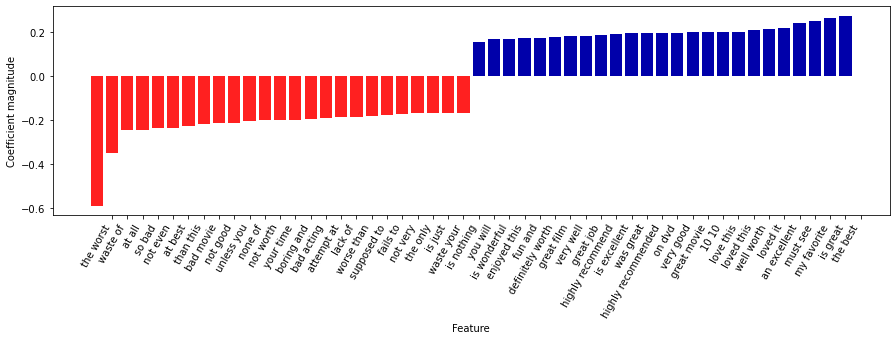

In [11]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=25)
plt.show()

In [12]:
lr = grid.best_estimator_
lr.fit(X_train, y_train)
lr.predict(X_test)
print("Score: {:.2f}".format(lr.score(X_test, y_test)))

Score: 0.87


In [13]:
pos = ["I've seen this story before but my kids haven't. Boy with troubled past joins military, faces his past, falls in love and becomes a man. "
       "The mentor this time is played perfectly by Kevin Costner; An ordinary man with common everyday problems who lives an extraordinary "
       "conviction, to save lives. After losing his team he takes a teaching position training the next generation of heroes. The young troubled "
       "recruit is played by Kutcher. While his scenes with the local love interest are a tad stiff and don't generate enough heat to melt butter, "
       "he compliments Costner well. I never really understood Sela Ward as the neglected wife and felt she should of wanted Costner to quit out of "
       "concern for his safety as opposed to her selfish needs. But her presence on screen is a pleasure. The two unaccredited stars of this movie "
       "are the Coast Guard and the Sea. Both powerful forces which should not be taken for granted in real life or this movie. The movie has some "
       "slow spots and could have used the wasted 15 minutes to strengthen the character relationships. But it still works. The rescue scenes are "
       "intense and well filmed and edited to provide maximum impact. This movie earns the audience applause. And the applause of my two sons."]
print("Pos prediction: {}". format(lr.predict(vect.transform(pos))))

Pos prediction: [1]


In [14]:
neg = ["David Bryce\'s comments nearby are exceptionally well written and informative as almost say everything "
       "I feel about DARLING LILI. This massive musical is so peculiar and over blown, over produced and must have "
       "caused ruptures at Paramount in 1970. It cost 22 million dollars! That is simply irresponsible. DARLING LILI "
       "must have been greenlit from a board meeting that said \"hey we got that Pink Panther guy and that Sound Of Music gal... "
       "lets get this too\" and handed over a blank cheque. The result is a hybrid of GIGI, ZEPPELIN, HALF A SIXPENCE, some MGM 40s "
       "song and dance numbers of a style (daisies and boaters!) so hopelessly old fashioned as to be like musical porridge, and MATA HARI "
       "dramatics. The production is colossal, lush, breathtaking to view, but the rest: the ridiculous romance, Julie looking befuddled, Hudson "
       "already dead, the mistimed comedy, and the astoundingly boring songs deaden this spectacular film into being irritating. LILI is"
       " like a twee 1940s mega musical with some vulgar bits to spice it up. STAR! released the year before sadly crashed and now is being "
       "finally appreciated for the excellent film is genuinely is... and Andrews looks sublime, mature, especially in the last half hour......"
       "but LILI is POPPINS and DOLLY frilly and I believe really killed off the mega musical binge of the 60s..... "
       "and made Andrews look like Poppins again... which I believe was not Edwards intention. Paramount must have collectively fainted "
       "when they saw this: and with another $20 million festering in CATCH 22, and $12 million in ON A CLEAR DAY and $25 million in PAINT YOUR WAGON...."
       "they had a financial abyss of CLEOPATRA proportions with $77 million tied into 4 films with very uncertain futures. Maybe they should have asked seer "
       "Daisy Gamble from ON A CLEAR DAY ......LILI was very popular on immediate first release in Australia and ran in 70mm cinemas for months but it failed "
       "once out in the subs and the sticks and only ever surfaced after that on one night stands with ON A CLEAR DAY as a Sunday night double. Thank "
       "god Paramount had their simple $1million (yes, ONE MILLION DOLLAR) film LOVE STORY and that $4 million dollar gangster pic THE GODFATHER "
       "also ready to recover all the $77 million in just the next two years....for just $5m.... incredible!"]
print("Neg prediction: {}". format(lr.predict(vect.transform(neg))))

Neg prediction: [0]
